In this notebook, we present the implementation of Autoencoder as well as Variational Autoencoder and compare its efficacy on the same data.

# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Loading Data

In [2]:
# Loading the MNIST data set
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Combining the train and test sets
mnist_digits = np.concatenate([x_train, x_test], axis=0)
#Normalizing pixel values between 0 and 1
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

# Autoencoder

AutoEncoder (AE) trained on MNIST digits using ANN

Encoder

In [14]:
latent_dim = 2

# encoded representation of input
inputs1 = keras.Input(shape=(28, 28, 1))
#Flatten Layer
flattene=layers.Flatten()(inputs1)

# Encoding layer 1
encoded1 = layers.Dense(128, activation="relu")(flattene)

# Encoding layer 2
encoded2 = layers.Dense(64, activation="relu")(encoded1)


#Bottleneck
bottleneck = layers.Dense(latent_dim, activation="relu")(encoded2)

Decoder

In [15]:

# decoded representation of code

# Decoding layer 1
decoded1 = layers.Dense(64, activation="relu")(bottleneck)

# Decoding layer 2
decoded2 = layers.Dense(128, activation="relu")(decoded1)

# output layer (without reshaping)
decoded3 = layers.Dense(784, activation="sigmoid")(decoded2)
# Reshaping the final output
output = layers.Reshape((28,28,1))(decoded3)

Defining the Autoencoder

In [16]:
# define autoencoder model
autoencoder = keras.Model(inputs=inputs1, outputs=output)

Define encoder and decoder separately

In [17]:
# define an encoder model (without the decoder)
encoder = keras.Model(inputs=inputs1, outputs=bottleneck)

In [18]:
decoder = keras.Model(inputs=bottleneck, outputs=output)

##Training

In [19]:
encoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 108866 (425.26 KB)
Trainable params: 108866 (425.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
decoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_9 (Dense)             (None, 64)                192       
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 109648 (428.31 KB)
Trainable params: 109648 (428.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
 dense_9 (Dense)             (None, 64)                192       
                                                                 
 dense_10 (Dense)            (None, 128)               8320

In [22]:
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())

In [23]:
history = autoencoder.fit(mnist_digits, mnist_digits, batch_size=128, epochs=10, verbose=True)

Epoch 1/10
547/547 [==============================] - 5s 5ms/step - loss: 0.0637
Epoch 2/10
547/547 [==============================] - 2s 5ms/step - loss: 0.0506
Epoch 3/10
547/547 [==============================] - 2s 4ms/step - loss: 0.0470
Epoch 4/10
547/547 [==============================] - 2s 4ms/step - loss: 0.0450
Epoch 5/10
547/547 [==============================] - 2s 4ms/step - loss: 0.0438
Epoch 6/10
547/547 [==============================] - 2s 4ms/step - loss: 0.0429
Epoch 7/10
547/547 [==============================] - 3s 5ms/step - loss: 0.0422
Epoch 8/10
547/547 [==============================] - 2s 4ms/step - loss: 0.0417
Epoch 9/10
547/547 [==============================] - 2s 4ms/step - loss: 0.0412
Epoch 10/10
547/547 [==============================] - 2s 4ms/step - loss: 0.0408


## Output

Displays a grid of sampled digits



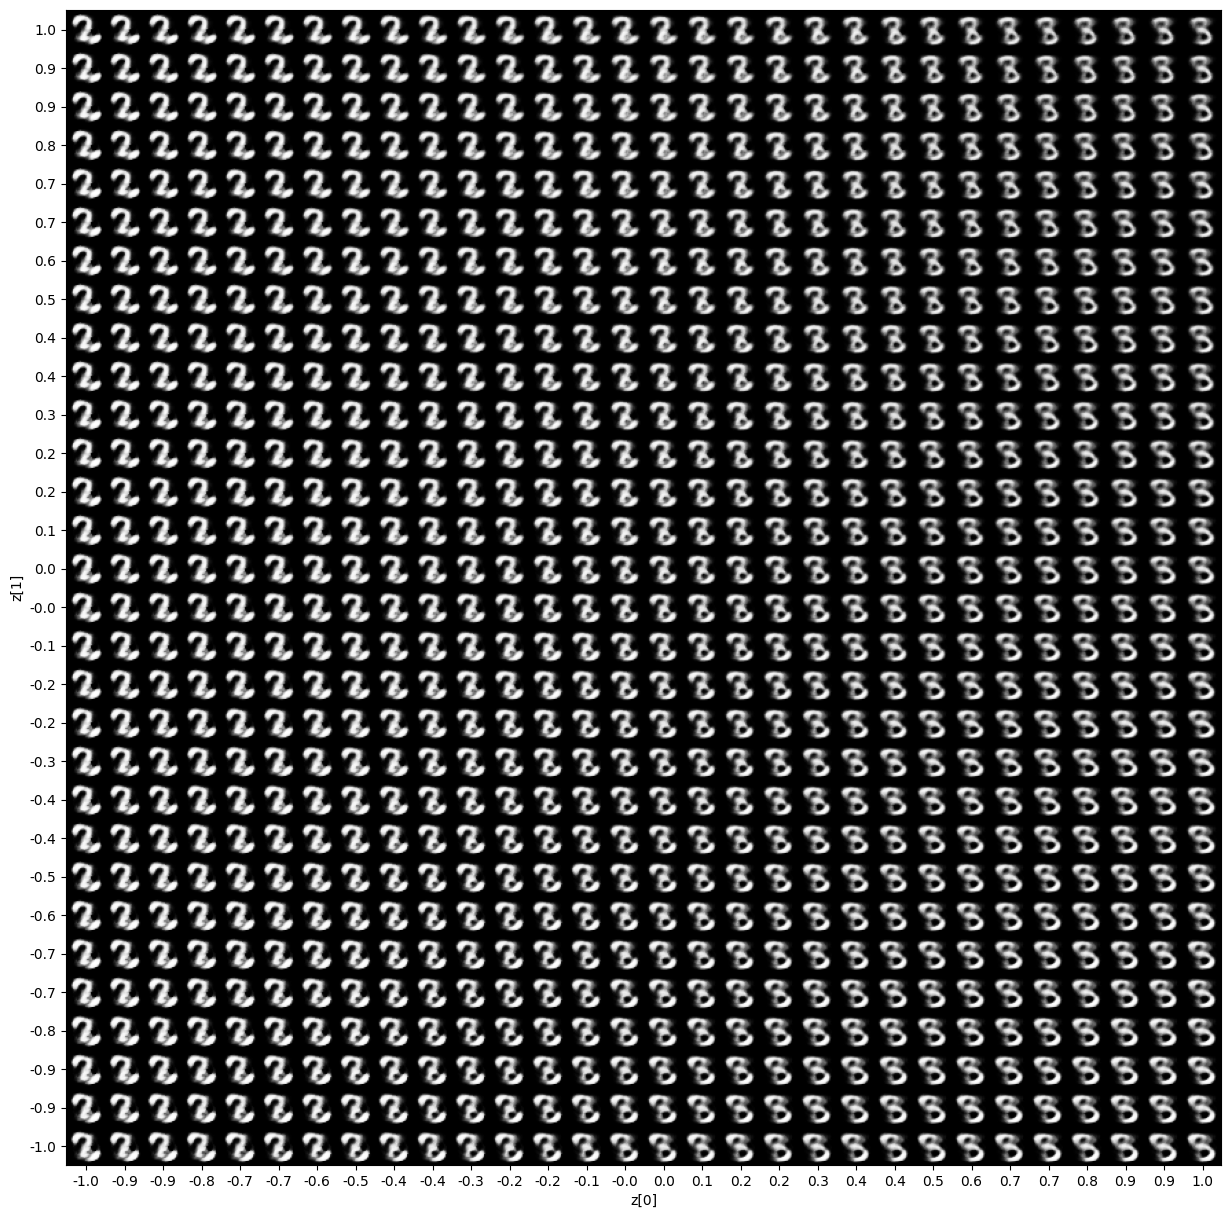

In [24]:
import matplotlib.pyplot as plt


def plot_latent_space(autoencoder, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(autoencoder)

## Latent Space Visualization

1875/1875 [==============================] - 3s 1ms/step


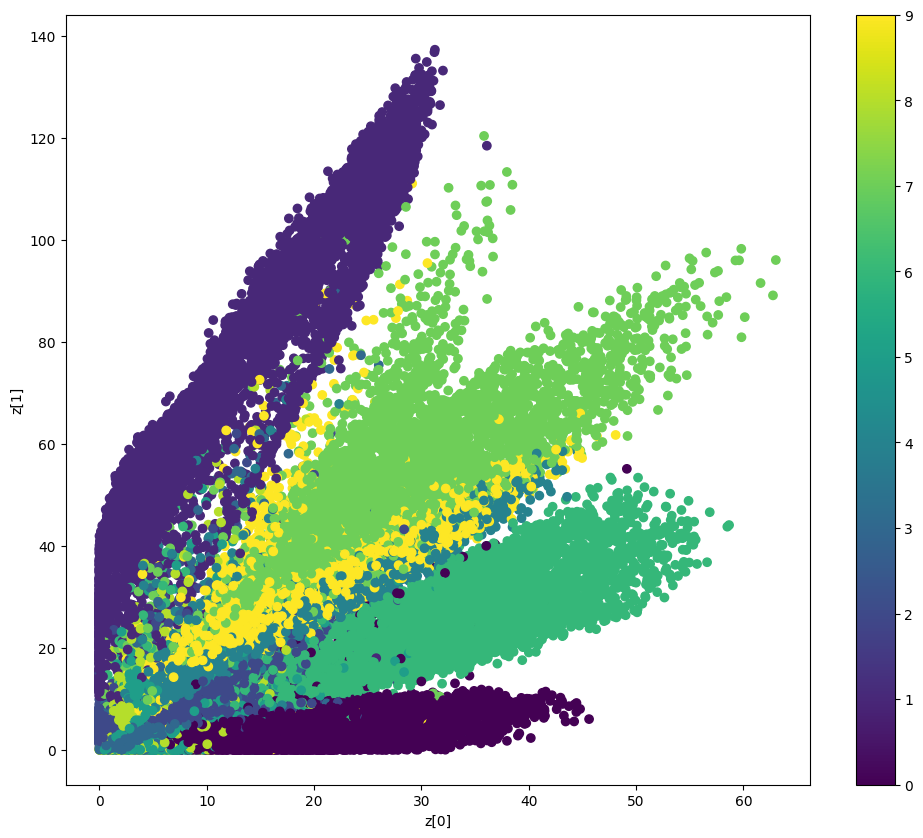

In [25]:
def plot_label_clusters(autoencoder, data, labels):
    # display a 2D plot of the digit classes in the latent space
    ls = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(ls[:, 0], ls[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(autoencoder, x_train, y_train)

# Variational AutoEncoder

Variational AutoEncoder (VAE) based on ANN trained on MNIST digits.

Sampling layer

In [38]:

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


Encoder

In [51]:
latent_dim = 2

# encoded representation of input
inputs = keras.Input(shape=(28, 28, 1))

#Flatten Layer
flattene=layers.Flatten()(inputs)

# Encoding layer 1
encoded1 = layers.Dense(512, activation="relu")(flattene)

# Encoding layer 2
encoded2 = layers.Dense(128, activation="relu")(encoded1)

# Encoding layer 3
encoded3 = layers.Dense(32, activation="relu")(encoded2)

z_mean = layers.Dense(latent_dim, name="z_mean")(encoded3)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(encoded3)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 flatten_7 (Flatten)         (None, 784)                  0         ['input_15[0][0]']            
                                                                                                  
 dense_36 (Dense)            (None, 512)                  401920    ['flatten_7[0][0]']           
                                                                                                  
 dense_37 (Dense)            (None, 128)                  65664     ['dense_36[0][0]']            
                                                                                            

Decoder

In [54]:
# decoded representation of code

#Latent inputs
latent_inputs = keras.Input(shape=(latent_dim,))

# Decoding layer 1
decoded1 = layers.Dense(32, activation="relu")(latent_inputs)

# Decoding layer 2
decoded2 = layers.Dense(128, activation="relu")(decoded1)

# Decoding layer 3
decoded3 = layers.Dense(512, activation="relu")(decoded2)


# output layer (without reshaping)
ol = layers.Dense(784, activation="sigmoid")(decoded3)
# Reshaping the final output
decoder_output = layers.Reshape((28,28,1))(ol)

decoder = keras.Model(latent_inputs, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_44 (Dense)            (None, 32)                96        
                                                                 
 dense_45 (Dense)            (None, 128)               4224      
                                                                 
 dense_46 (Dense)            (None, 512)               66048     
                                                                 
 dense_47 (Dense)            (None, 784)               402192    
                                                                 
 reshape_9 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 472560 (1.80 MB)
Trainable params: 472560 (1.

Variational Autoencoder

In [55]:

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


## Training

In [56]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 8s 6ms/step - loss: 219.3481 - reconstruction_loss: 180.0742 - kl_loss: 5.0276
Epoch 2/10
547/547 [==============================] - 4s 6ms/step - loss: 163.6156 - reconstruction_loss: 156.4269 - kl_loss: 5.1089
Epoch 3/10
547/547 [==============================] - 3s 6ms/step - loss: 156.6045 - reconstruction_loss: 149.9102 - kl_loss: 5.5492
Epoch 4/10
547/547 [==============================] - 4s 6ms/step - loss: 152.5308 - reconstruction_loss: 145.8956 - kl_loss: 5.8279
Epoch 5/10
547/547 [==============================] - 3s 6ms/step - loss: 149.2565 - reconstruction_loss: 143.0377 - kl_loss: 6.0318
Epoch 6/10
547/547 [==============================] - 4s 7ms/step - loss: 147.5889 - reconstruction_loss: 141.0029 - kl_loss: 6.1915
Epoch 7/10
547/547 [==============================] - 3s 5ms/step - loss: 146.0779 - reconstruction_loss: 139.4779 - kl_loss: 6.2811
Epoch 8/10
547/547 [==============================] - 3s 6ms/step - l

## Output

Displays a grid of sampled digits

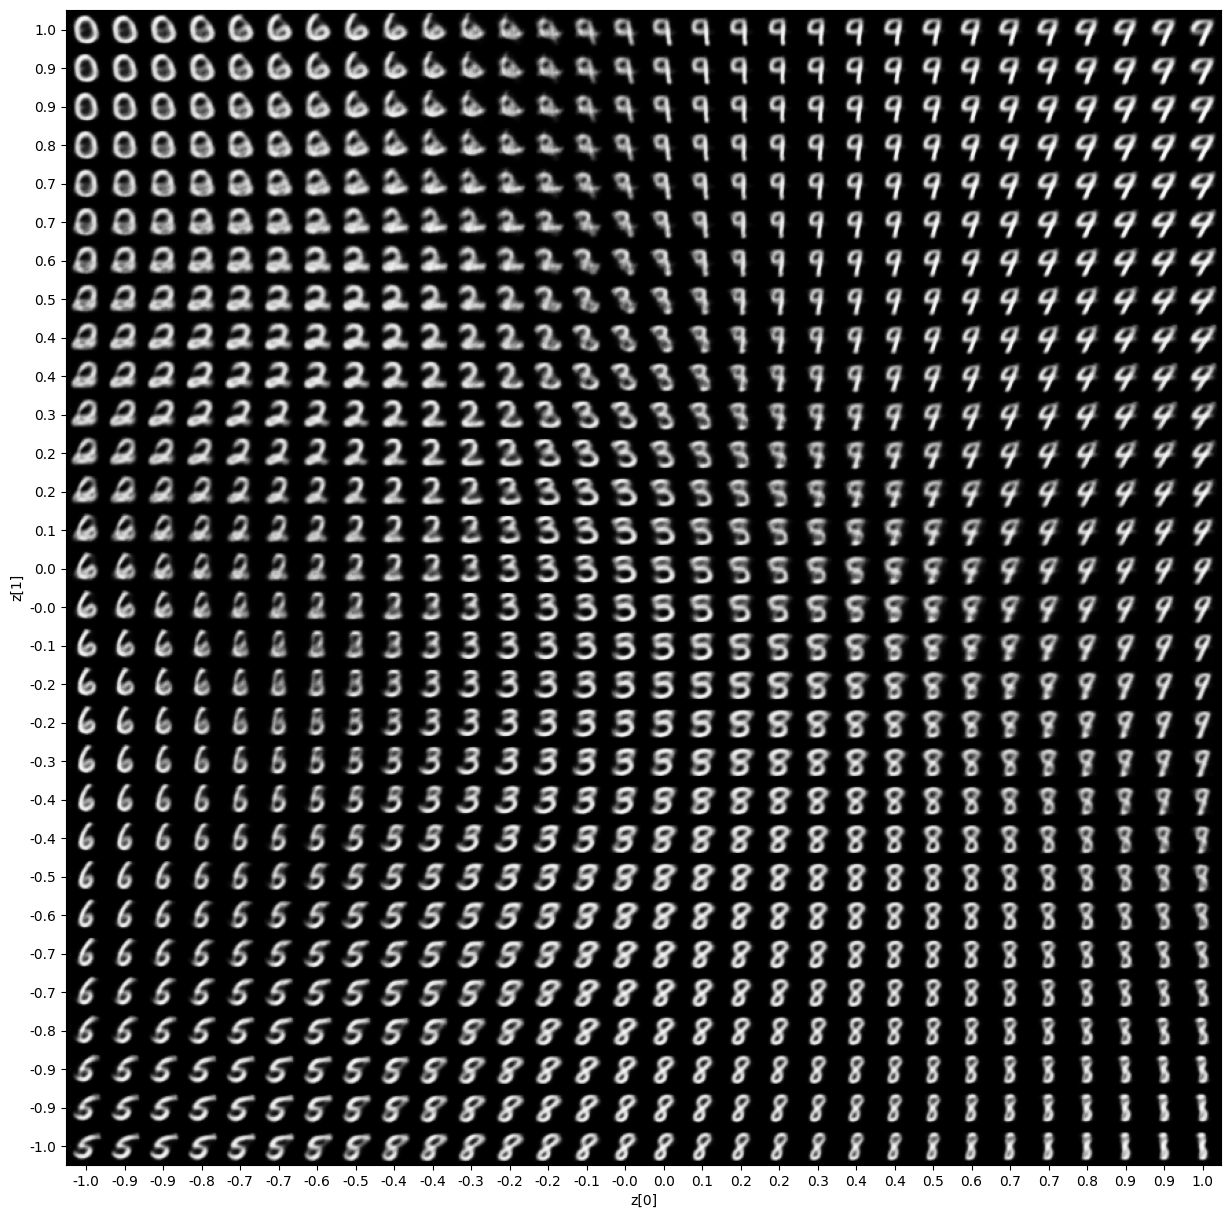

In [57]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

## Latent Space Visualization



1875/1875 [==============================] - 4s 2ms/step


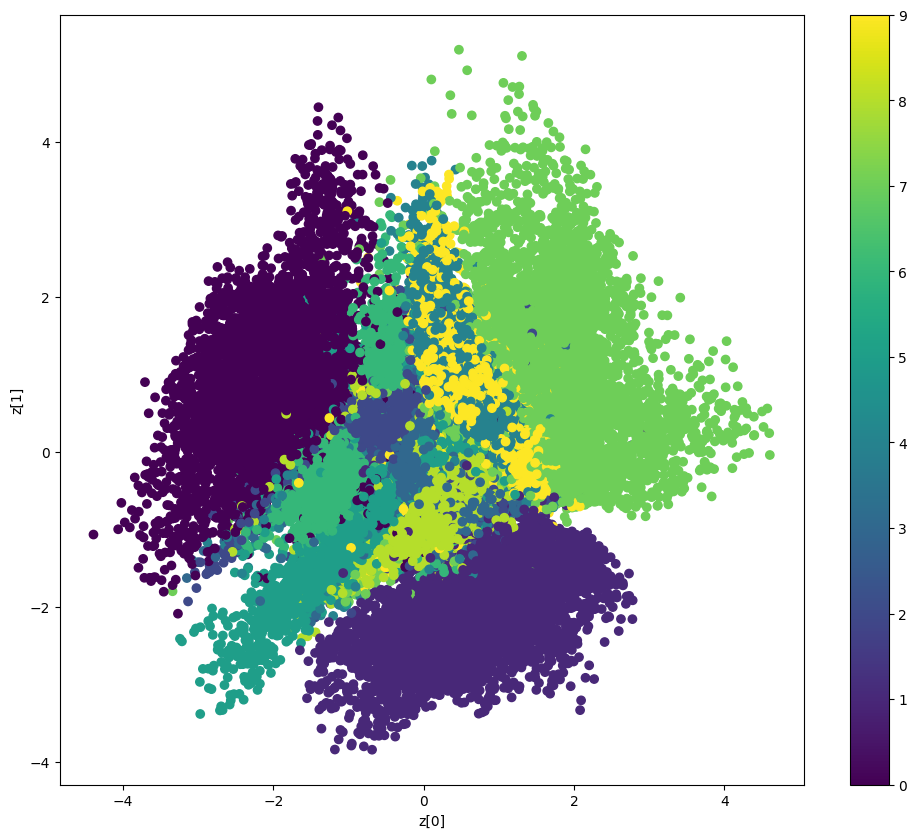

In [58]:

def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)